# Classification de vidéos Youtube

In [3]:
import struct

#import numpy as np



file = open("test_bin","rb")

octet = file.read(1)

n=0

a=0

sortie = open('testlect.bin','wb')

sortie.write(octet)



def bvo(desoctets):

    for i in range(desoctets):

        sortie.write()





while n<100:

    octet = file.read(1)

    n=n+1

    sortie.write(octet)

    print(octet)



    #if 36<=n<44:  #Pour trouver le Nombre de point (vertices number)

    #    print(octet)




    if n==35:  #Pour convertir la valeur du nombre de point entre 0 et 1220 (vertices number)

        a = file.read(8)

        n=n+8

        #print(a)

        valeur = int.from_bytes(a,'little')

        print('nbr de points:', valeur)

       

        #print('LOLLLOOL',valeurbin[0:10])

        #print('LaabababababL',valeurbin[10:20])

        sortie.write(bytes(string,valeurbin[2:10]))

        #sortie.write(hex(int(bin(valeur),2)))



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-3-b7ad9874f3c5>, line 3)

## Introduction

Dans ce projet , nous allons étudier les attributs(nombre de vues,de likes,...) caractérisant les vidéos youtubes ayant été en tendance afin de pouvoir déterminer les attributs responsables de cette popularité.

## Importation des librairies

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn import metrics
from chefboost import Chefboost as chef


## Chargement de la dataframe correspondant aux données des vidéos youtube de France

En premier lieu nous avons chargé notre document puis nous avons ajouté une colonne "Category" car nous voulions avoir un attribut plus représentatif que "Category_id"

In [86]:
df=pd.read_csv("\\Users\hp\Desktop\Data science\Tp4\FRvideos.csv")

#Ajout d'une colonne Categories
categories=df["category_id"].values
cates=[]
for i in range(len(categories)):
    if(categories[i]==1):
        cates=cates+["Films & Animations"]
    elif(categories[i]==2):
        cates=cates+["Autos & Vehicles"]
    elif(categories[i]==10):
        cates=cates+["Music"]
    elif(categories[i]==15):
        cates=cates+["Pets & Animals"]
    elif(categories[i]==17):
        cates=cates+["Sports"]
    elif(categories[i]==18):
        cates=cates+["Shorts movies"]
    elif(categories[i]==19):
        cates=cates+["Travels & Events"]
    elif(categories[i]==20):
        cates=cates+["Gaming"]
    elif(categories[i]==21):
        cates=cates+["Videoblogging"]
    elif(categories[i]==22):
        cates=cates+["People & Blogs"]
    elif(categories[i]==23):
        cates=cates+["Comedy"]
    elif(categories[i]==25):
        cates=cates+["News & Politics"]
    elif(categories[i]==26):
        cates=cates+["Houto & Styles"]
    elif(categories[i]==27):
        cates=cates+["Education"]
    elif(categories[i]==28):
        cates=cates+["Science & Technology"]
    elif(categories[i]==30):
        cates=cates+["Movies"]
    elif(categories[i]==31):
        cates=cates+["Anim/Animation"]
    elif(categories[i]==32):
        cates=cates+["Action/Adventure"]
    elif(categories[i]==33):
        cates=cates+["Classics"]
    elif(categories[i]==34):
        cates=cates+["Comedy"]
    elif(categories[i]==35):
        cates=cates+["Documentary"]
    elif(categories[i]==36):
        cates=cates+["Drama"]
    elif(categories[i]==37):
        cates=cates+["Family"]
    elif(categories[i]==38):
        cates=cates+["Foreign"]
    elif(categories[i]==39):
        cates=cates+["Horror"]
    elif(categories[i]==40):
        cates=cates+["Sci-fi/Fantasy"]
    elif(categories[i]==41):
        cates=cates+["Thiller"]
    elif(categories[i]==42):
        cates=cates+["Shorts"]
    elif(categories[i]==43):
        cates=cates+["Shows"]
    elif(categories[i]==44):
        cates=cates+["Trailer"]
    else:
        cates=cates+["Unknown"]
        
df["Category"]=cates

df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Unknown
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Unknown
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,Comedy
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",Gaming
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40719,coVXf3Q9xBk,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,2018-06-13T12:31:04.000Z,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...,Films & Animations
40720,_umkjOQJvtw,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,2018-06-12T17:51:24.000Z,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...,News & Politics
40721,nt25ec7nzIM,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,22,2018-06-13T11:50:18.000Z,"RushManga|""rush manga""|""anime a voir""|""UN ANIM...",47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,False,False,False,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...,People & Blogs
40722,NlxE_QQMRzg,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,1,2018-06-13T18:30:00.000Z,"Նռան հատիկ|""Սերիա 192""|""Pomegranate seed""|""Nra...",78117,244,74,46,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,False,False,False,Follow Armenia TV on social platforms:Instagra...,Films & Animations


## Détails sur les données à étudier 

Voici un aperçu des données à étudier

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40724 non-null  object
 1   trending_date           40724 non-null  object
 2   title                   40724 non-null  object
 3   channel_title           40724 non-null  object
 4   category_id             40724 non-null  int64 
 5   publish_time            40724 non-null  object
 6   tags                    40724 non-null  object
 7   views                   40724 non-null  int64 
 8   likes                   40724 non-null  int64 
 9   dislikes                40724 non-null  int64 
 10  comment_count           40724 non-null  int64 
 11  thumbnail_link          40724 non-null  object
 12  comments_disabled       40724 non-null  bool  
 13  ratings_disabled        40724 non-null  bool  
 14  video_error_or_removed  40724 non-null  bool  
 15  de

In [88]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06


A travers ce tableau ,On constate que le nombre de vues moyen d'une vidéo populaire est 4.119.921,9 millions mais en regardant la médiane, on constate que la moitié possède un nombre de vues supérieur à 73.721 milles et l'autre moitié inférieur à 73.721.On constate aussi que le nombre moyen de likes est de 17.388,86 milles alors que la médiane est de 1892,5.Le nombre moyen de dislikes est de 814,9624  alors que la médiane est de 83.

In [89]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.083139,-0.087377,-0.014931,-0.042850,0.038518,0.000589,-0.020990
views,-0.083139,1.000000,0.812569,0.586997,0.708161,-0.003317,-0.000780,0.000163
likes,-0.087377,0.812569,1.000000,0.450548,0.849647,-0.024617,-0.026447,-0.000397
dislikes,-0.014931,0.586997,0.450548,1.000000,0.664893,-0.007674,-0.009488,-0.000566
comment_count,-0.042850,0.708161,0.849647,0.664893,1.000000,-0.019494,-0.015685,-0.001340
comments_disabled,0.038518,-0.003317,-0.024617,-0.007674,-0.019494,1.000000,0.473975,-0.003473
ratings_disabled,0.000589,-0.000780,-0.026447,-0.009488,-0.015685,0.473975,1.000000,-0.003084
video_error_or_removed,-0.020990,0.000163,-0.000397,-0.000566,-0.001340,-0.003473,-0.003084,1.000000


Nous voyons par exemple que les vues et les likes sont fortement corrélés  avec une valeur de corrélation de 0,81 ; nous voyons aussi une corrélation positive  élevée  entre les likes et le nombre de commentaires qui est de 0,84, et entre les aversions et le nombre de commentaires qui est de 0,70.


Regardons par exemple en quelle année ces données ont été récoltées.

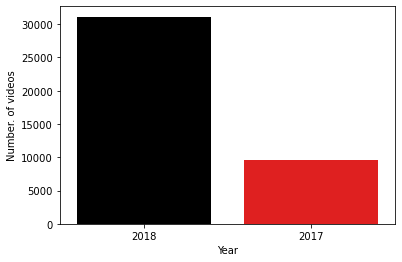

In [90]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "Number_of_videos"})

fig, ax = plt.subplots()
sns.barplot(x="year", y="Number_of_videos", data=cdf,palette=sns.color_palette(['#000', '#FF0000']), ax=ax)
_=ax.set(xlabel="Year", ylabel="Number. of videos")

In [91]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,Category
count,40724,40724,40724,40724,40724,40724,40724,37812,40724
unique,30184,205,30544,6680,29234,22903,30572,25002,17
top,#NOM?,17.27.11,J+1,Troom Troom FR,2017-12-15T17:00:04.000Z,[none],https://i.ytimg.com/vi/Rter-Np-Td0/default.jpg,Retrouvez - nous sur http://www.marodi.tv ou t...,Unknown
freq,528,200,27,195,12,5304,6,129,9933


Dans le tableau ci-dessus, nous pouvons voir qu’il y a 205 dates uniques, ce qui signifie que notre ensemble de données contient des données recueillies sur les vidéos de tendance sur 205 jours.D’après la description de video_id, nous pouvons voir qu’il y a 40724 vidéos , mais nous pouvons également voir qu’il n’y a que 30184 vidéos uniques, ce qui signifie que certaines vidéos sont apparues sur la liste des vidéos tendance sur plus d’une journée. Le tableau nous dit aussi que le titre le plus fréquent est J+1 et qu’il est apparu 27 fois sur la liste des vidéos tendance.



C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


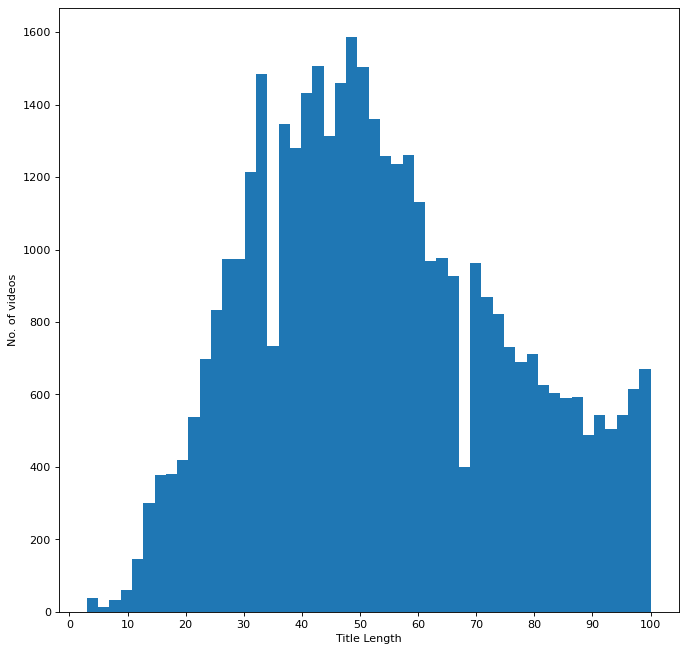

In [92]:
#Ajoutons une colonne longueur de titre à notre ensemble de données
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(10,10), dpi=80)
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                  hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

On constate la majorité des vidéos populaires ont entre 30 et 60 caractères.

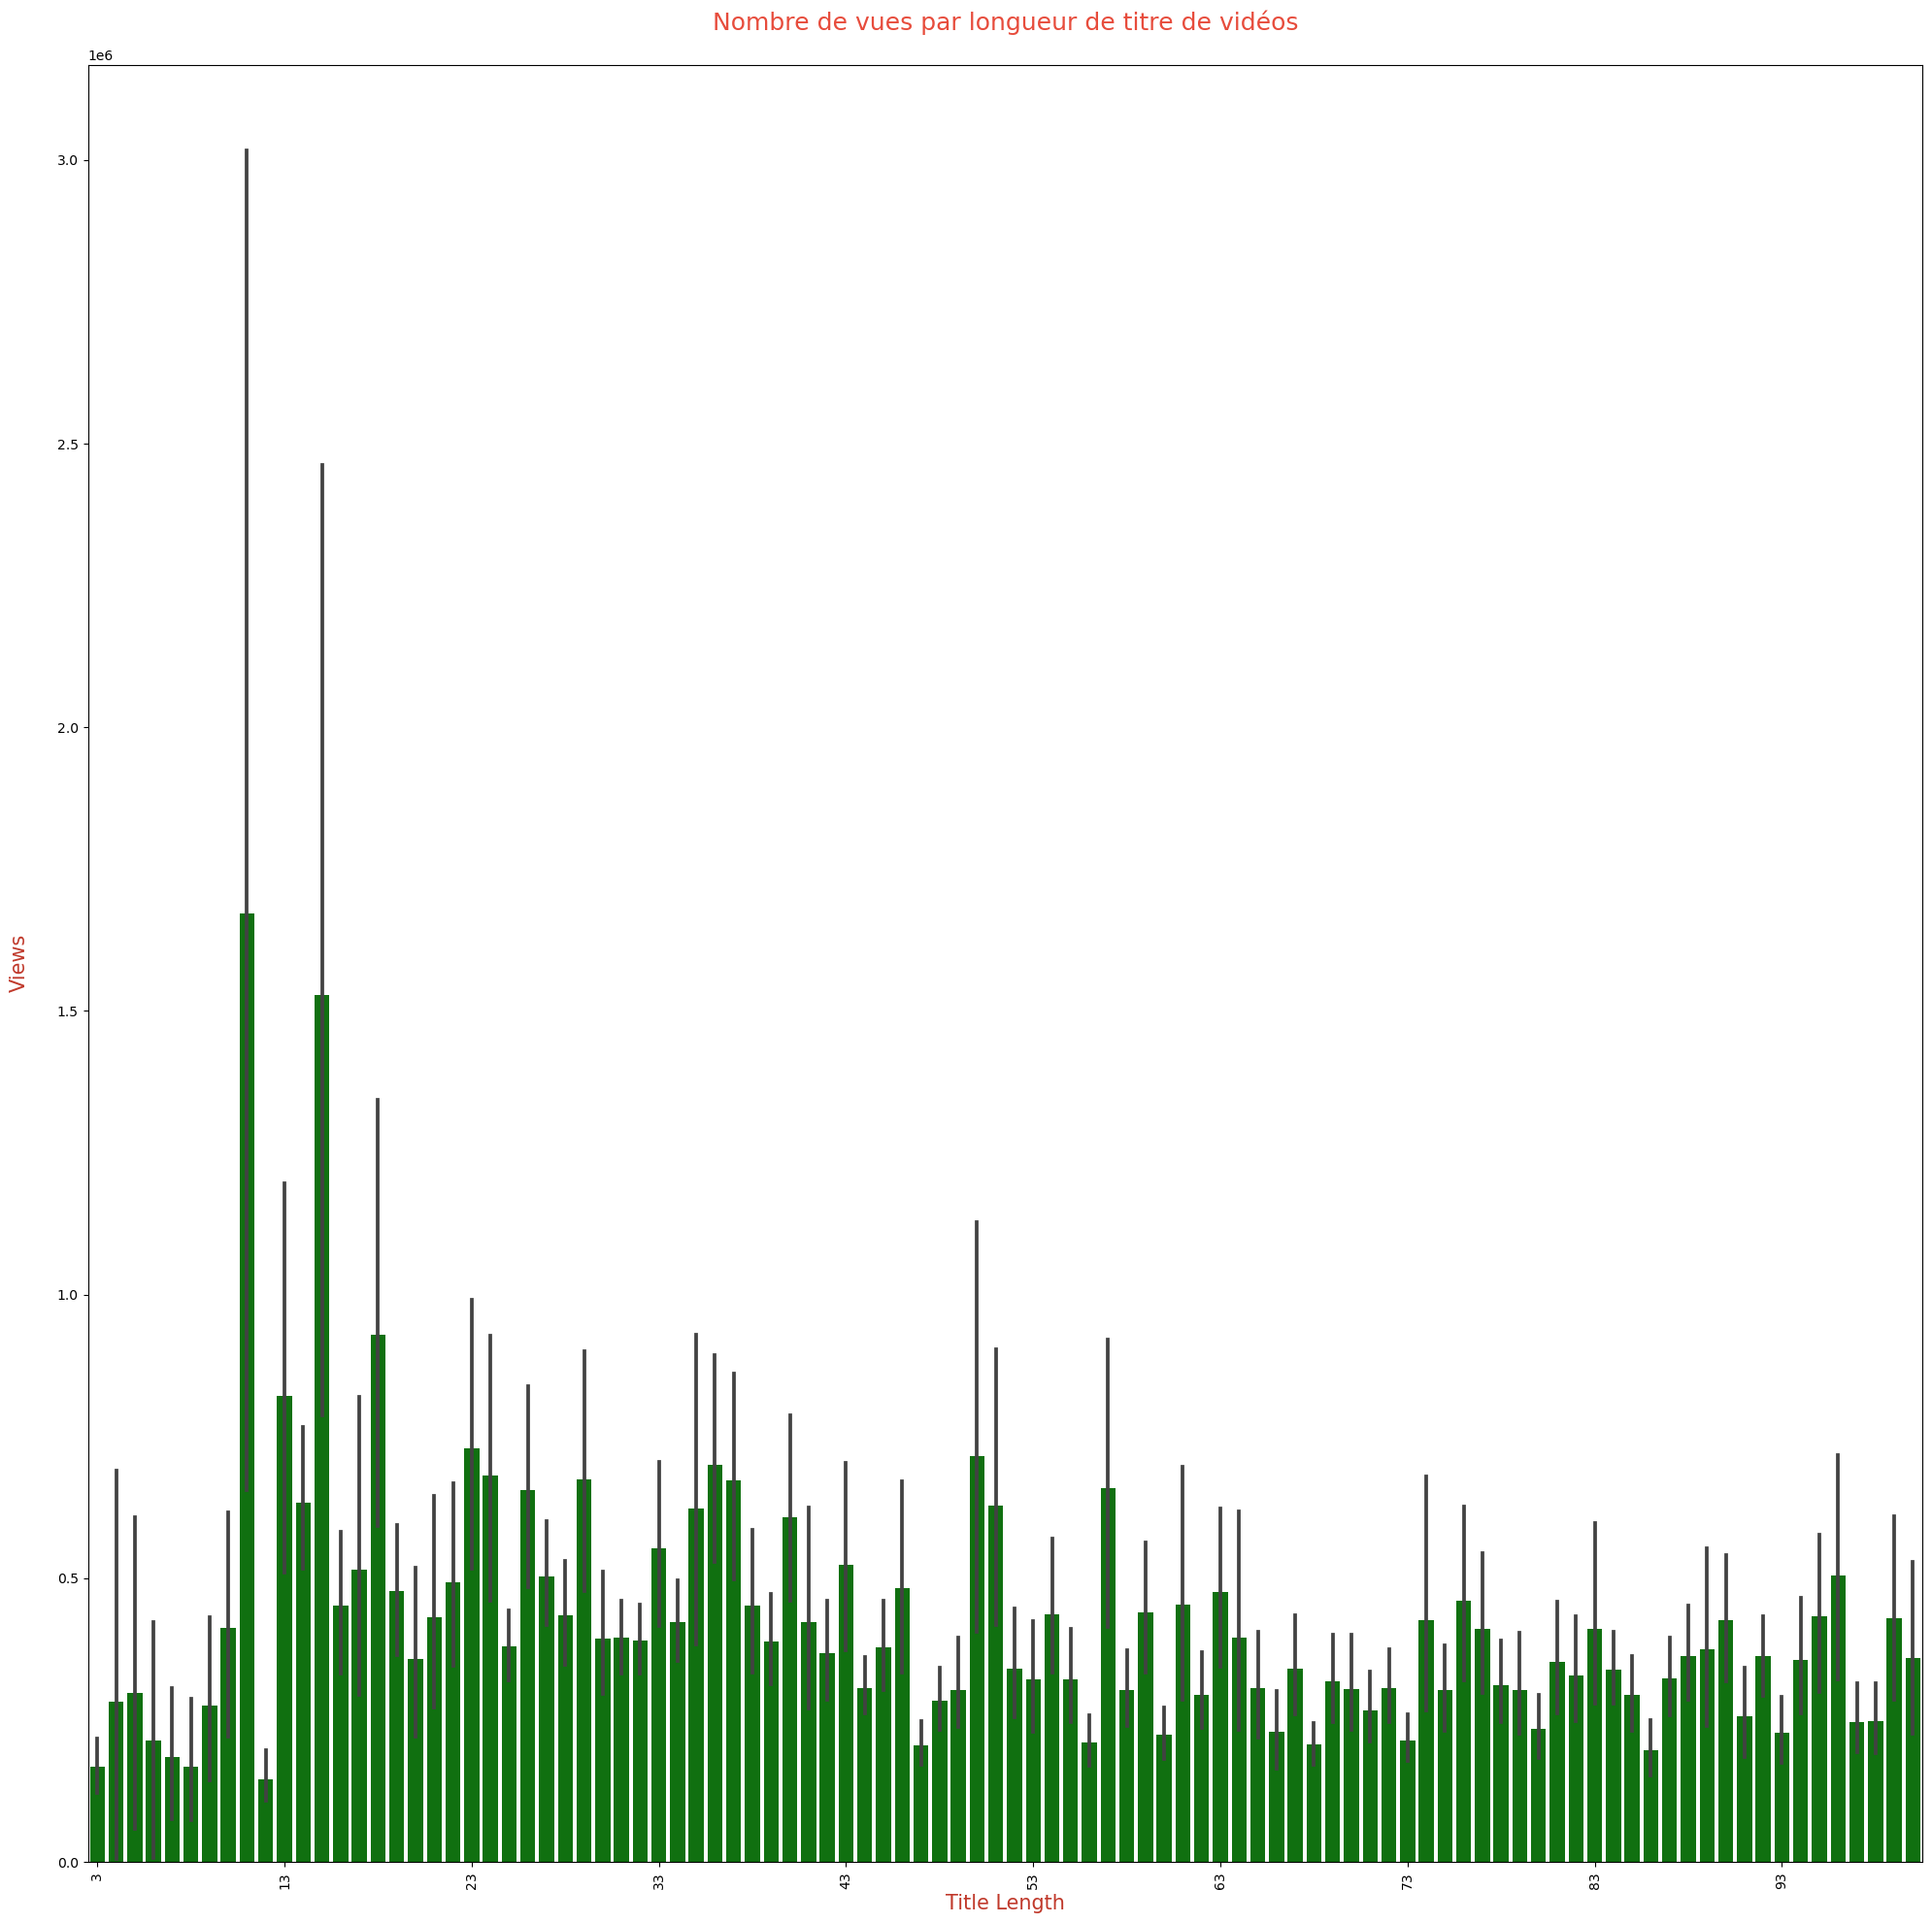

In [93]:

df["title_length"] = df["title"].apply(lambda x: len(x))

plt.figure(figsize=(20,20),dpi=100)

sns.barplot(x=df['title_length'], y=df['views'],color='#008000')
plt.xlabel('Title Length', fontsize=15, color='#c0392b')
plt.ylabel("Views\n", fontsize=15, color='#c0392b')
plt.title("Nombre de vues par longueur de titre de vidéos\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 90)
plt.tight_layout()
 
ax = plt.gca()
_=ax.set(xticks=range(0, 100, 10))

 

On constate que la majorité des vidéos populaires ont entre 12 et 23 caractères.

## Visualisation grapique des données afin de déterminer des axes d'études

Nous allons effectuer la visualisation des vues,likes,dislikes et commentaires en fonction des catégories 
afin de dégager des dépendances entre les attributs

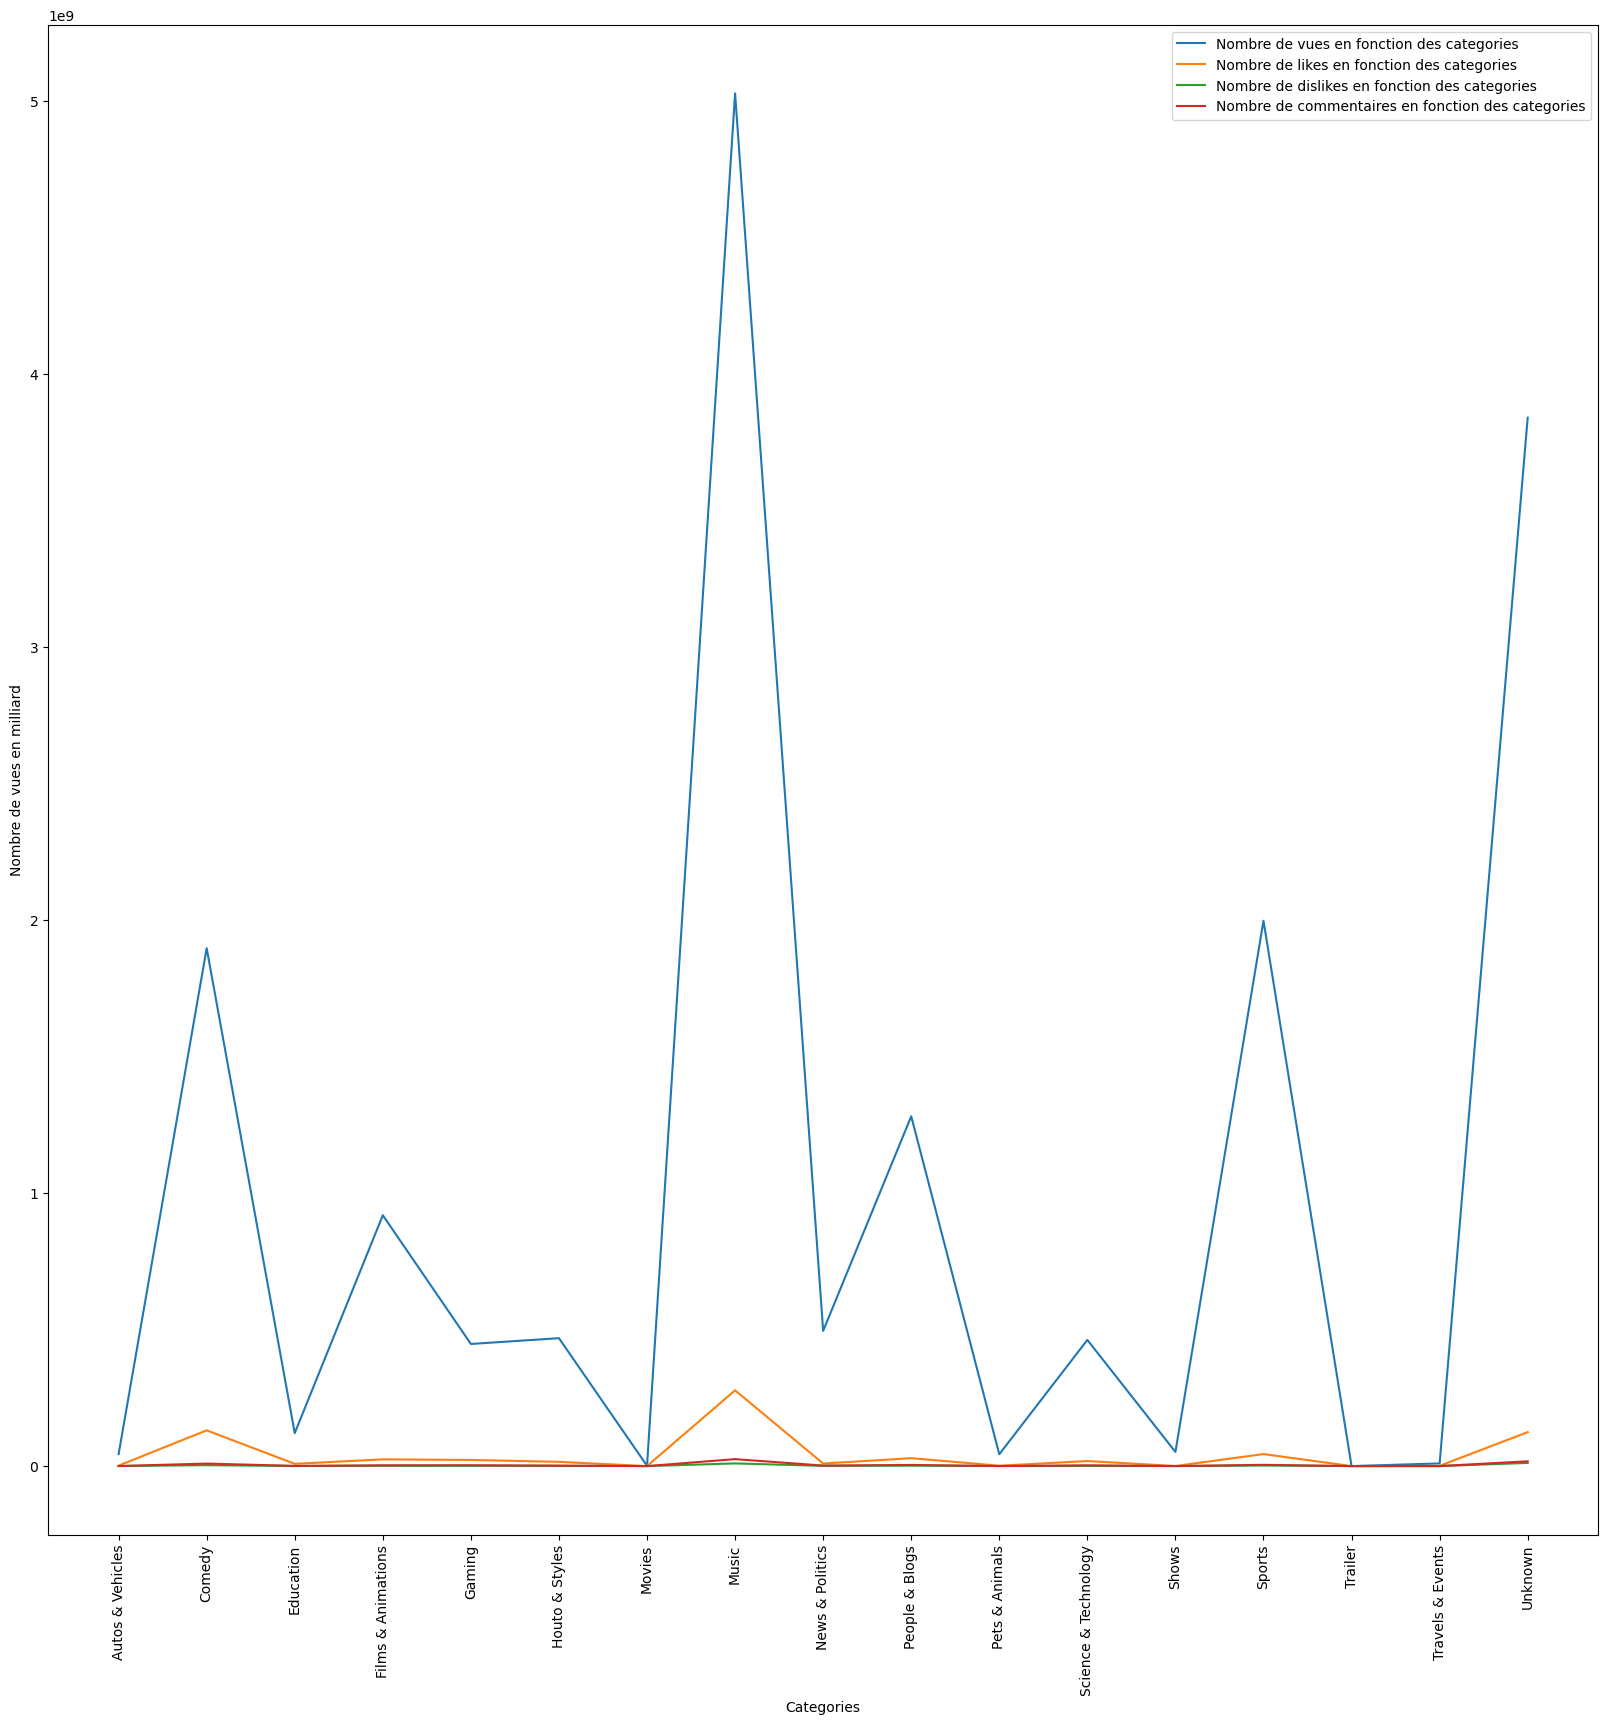

In [94]:
plt.figure(figsize=(20,20),dpi=100)

df=df.sort_values(by = 'views')

C=df["category_id"]
V=df["views"]
somme=df.groupby("Category").sum()

somme

C=somme.index
V=somme["views"]
L=somme["likes"]
D=somme["dislikes"]
Co=somme["comment_count"]

ax = plt.gca()
ax.set_xlabel('Categories')
ax.set_ylabel('Nombre de vues en milliard')

plt.plot(C,V,label='Nombre de vues en fonction des categories')
plt.plot(C,L,label='Nombre de likes en fonction des categories')
plt.plot(C,D,label='Nombre de dislikes en fonction des categories')
plt.plot(C,Co,label='Nombre de commentaires en fonction des categories')
plt.legend()
_=plt.xticks(rotation=90)

On constate que dans la majorité des cas que l'évolution du nombre de vues  entraine une évolution du nombre de likes et pareillement avec le nombre de likes et de commentaires mais c'est moins flagrant.

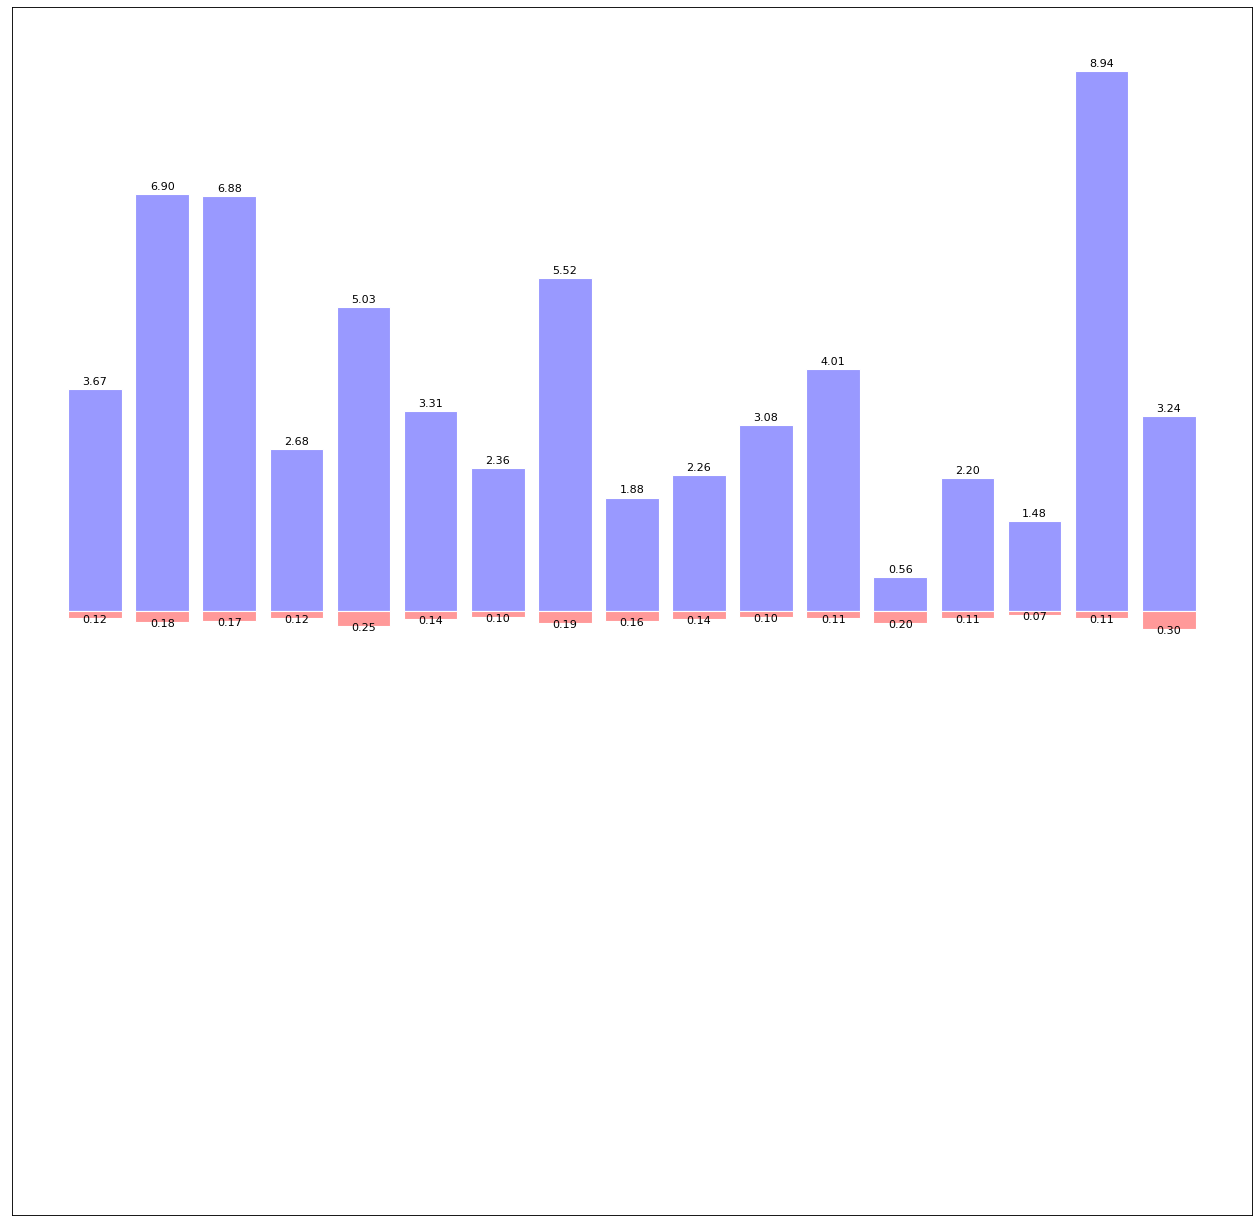

In [95]:
#Visualisation du pourcentage total de likes et de dislikes par catégorie

plt.figure(figsize=(20,20), dpi=80)
n = len(C)
X = np.arange(n)



Y1 =  (somme["likes"] / somme["views"])*100
Y2 = (somme["dislikes"] / somme["views"] )*100


plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x, y + 0.05, '%.2f' % y,
             ha='center', va='bottom')
for x, y in zip(X, Y2):
    plt.text(x, -y - 0.10, '%.2f' % y,
             ha='center', va='bottom')

plt.ylim(-10, +10)
plt.xticks(())
plt.yticks(())
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


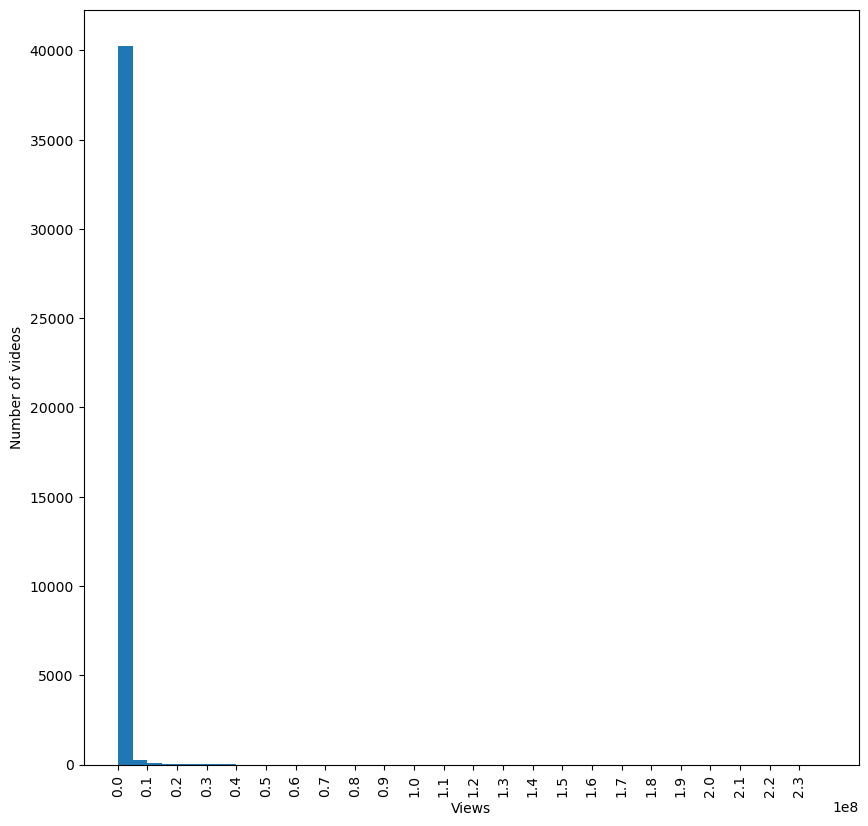

In [96]:
#Visualisation du nombre de vues en fonction du nombre de videos pour estimer le nombres de vues moyen des videos pouplaires

fig, ax = plt.subplots(figsize=(10,10),dpi=100)
_ = sns.distplot(df["views"], kde=False, 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="Number of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

On remarque que la majorité des vidéos populaires ont un nombre de vues inférieur ou égal à 5 millions

In [97]:
#calcul du pourcentage des vidéos ayant moins ou 5 millions de vues
df[df['views'] < 5e6]['views'].count() / df['views'].count() * 100

98.8802671643257

En effet, on peut confimer que 98 % des vidéos ont un nombre de vues inférieur à 5 millions et le reste est supérieur 5 millions.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


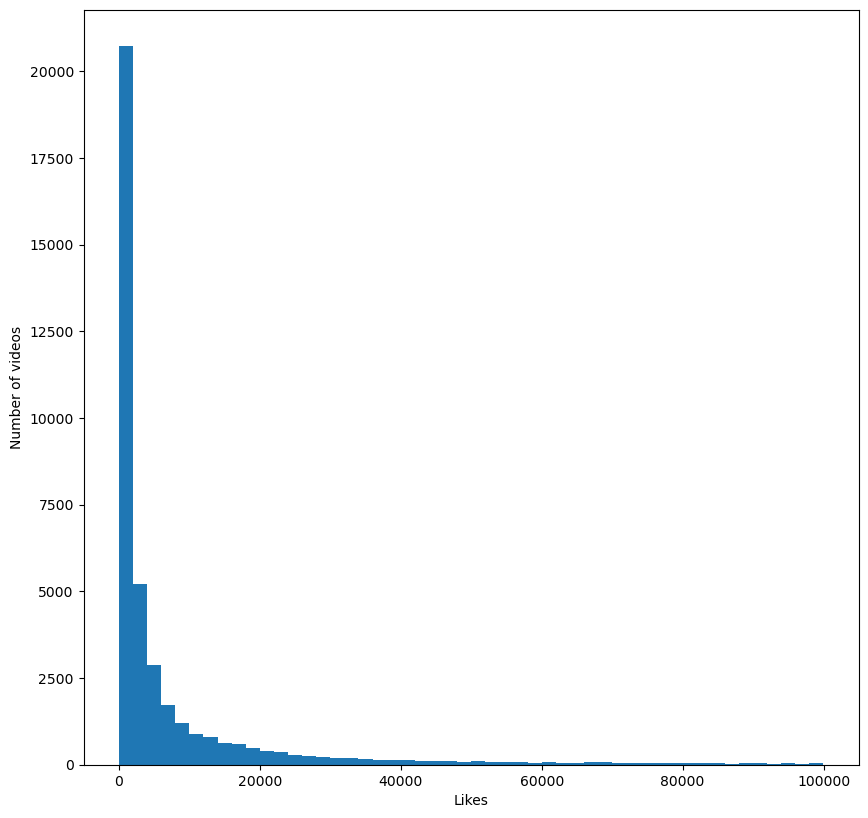

In [98]:
fig, ax = plt.subplots(figsize=(10,10),dpi=100)
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="Number of videos")

On remarque que la majorité des vidéos populaires ont un nombre de likes inférieur ou égal à 2222.

In [99]:
#calcul du pourcentage des vidéos ayant moins ou 2222 likes
df[df['likes'] <=2222]['likes'].count() / df['likes'].count() * 100

52.87054316864748

En effet, on peut confimer que 52 % des vidéos ont un nombre de likes inférieur ou égal à 2222 et le reste est supérieur.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


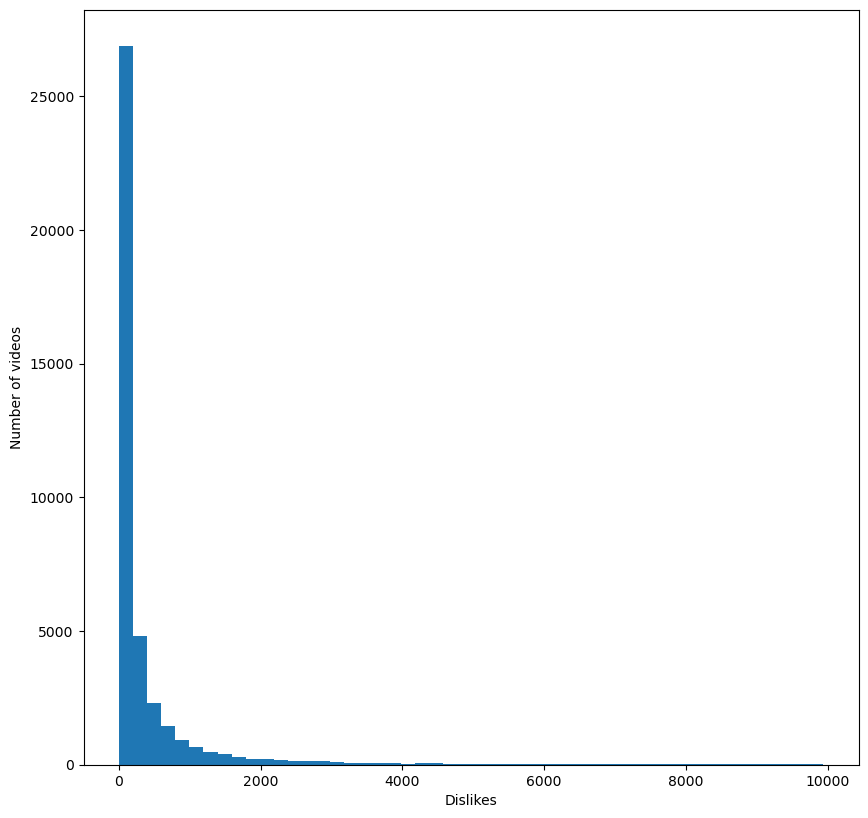

In [100]:
fig, ax = plt.subplots(figsize=(10,10),dpi=100)
_ = sns.distplot(df[df["dislikes"] <= 1e4]["dislikes"], kde=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Dislikes", ylabel="Number of videos")

On remarque que la majorité des vidéos populaires ont un nombre de dislikes inférieur ou égal à 200

In [101]:
#calcul du pourcentage des vidéos ayant moins ou 200 dislikes
df[df['dislikes'] <=200]['dislikes'].count() / df['dislikes'].count() * 100

66.25331499852666

En effet, on peut confimer que 66 % des vidéos ont un nombre de dislikes inférieur ou égal à 200 et le reste est supérieur.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


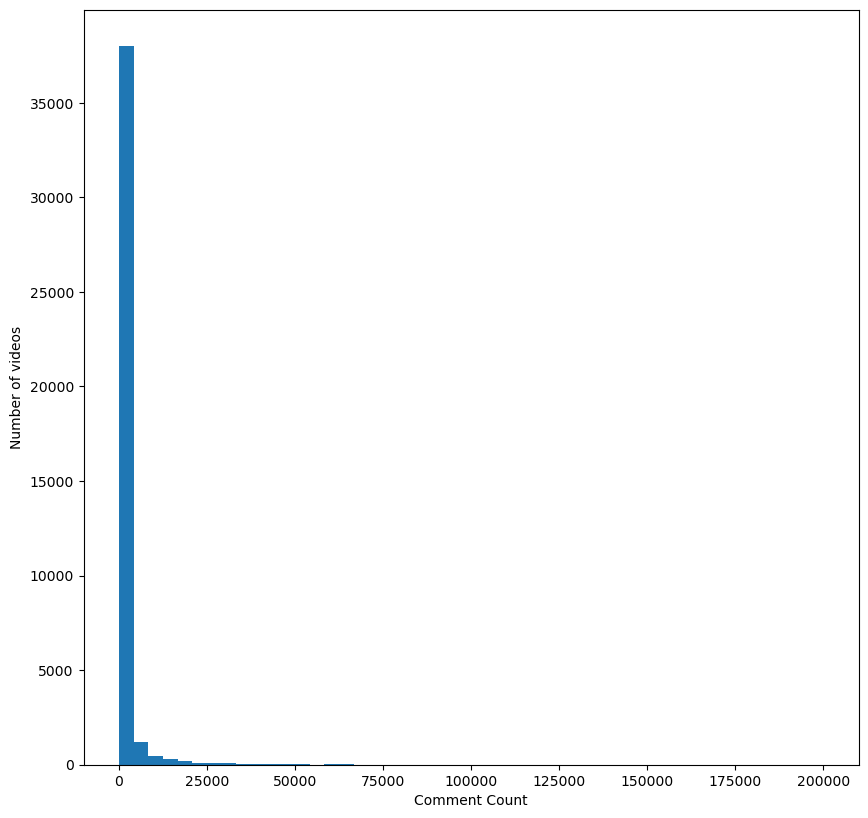

In [102]:
fig, ax = plt.subplots(figsize=(10,10),dpi=100)
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="Number of videos")

On remarque que la majorité des vidéos populaires ont un nombre de commentaires inférieur ou égal à 5000

In [103]:
#calcul du pourcentage des vidéos ayant moins ou 5000 commentaires
df[df['comment_count'] <=5000]['comment_count'].count() / df['comment_count'].count() * 100

94.34731362341616

En effet, on peut confimer que 94 % des vidéos ont un nombre de commentaires inférieur ou égal à 5000 et le reste est supérieur.

In [104]:
nbr = df[['Category','views']].groupby('Category').count().sort_values(by='views', ascending=False)
nbr.reset_index(0, inplace=True)
nbr.rename(columns={'Category':'Category'}, inplace=True)
nbr.head()


,Category,views
0,Unknown,9933
1,People & Blogs,5719
2,Comedy,4343
3,Sports,4342
4,Music,3946


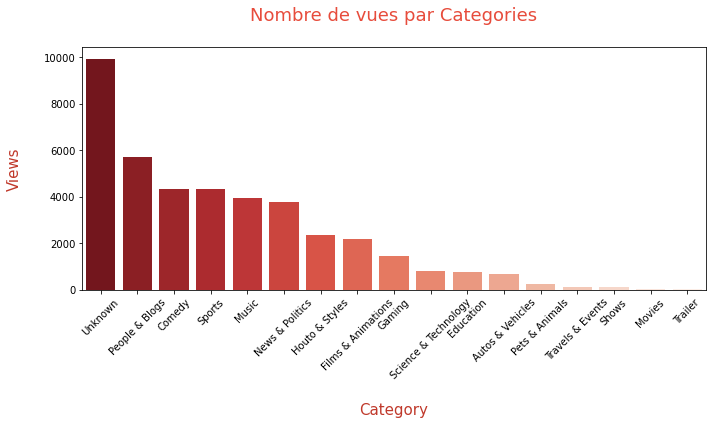

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(x=nbr['Category'], y=nbr['views'], palette="Reds_r")
plt.xlabel('\nCategory', fontsize=15, color='#c0392b')
plt.ylabel("Views\n", fontsize=15, color='#c0392b')
plt.title("Nombre de vues par Categories\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

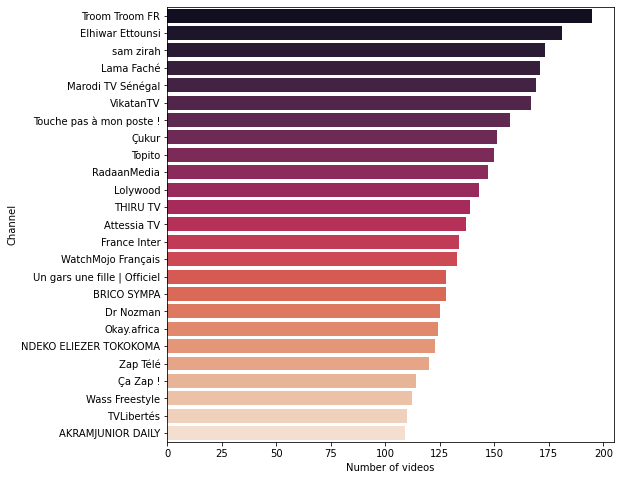

In [106]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(25)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette="rocket", ax=ax)
_ = ax.set(xlabel="Number of videos", ylabel="Channel")

On constate que la majorité des vidéos populaires appartiennent à la chaine TROOM TROOM FR.

## Modélisation de notre dataframe à des fins de prédiction

Nous avons décidé de regrouper les vidéos par catégories en effectuant la somme des attributs numériques afin de pouvoir se faire une idée par exemple sur le nombre total de vues,likes,dislikes par catégories


In [107]:
df=df.sort_values(by = 'views')

C=df["category_id"]
V=df["views"]
somme=df.groupby("Category").sum()

somme

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_length
Category,,,,,,,,,
Autos & Vehicles,1346,43764940,1606767,52260,207973,32,30,1,30473
Comedy,99889,1896284649,130805444,3391288,9136814,7,16,1,194404
Education,20763,120742556,8302644,201359,768074,83,8,0,39433
Films & Animations,2157,918517018,24631422,1092744,2841655,33,42,7,110916
Gaming,29180,447160176,22502704,1097458,3047593,6,16,1,73215
Houto & Styles,61386,468344413,15519633,643543,1759358,22,20,0,121396
Movies,330,1028214,24295,1048,1467,0,0,0,611
Music,39460,5026447522,277314234,9772318,25446289,23,24,2,178456
News & Politics,93800,495045563,9301486,775868,1896101,223,150,3,247353


De ce tableau, on constate que la musique est la catégorie cumulant le plus de vues ou de likes avec 5.026.447.522 milliards de vues et 277.314.234 millions de likes

D'après la table de correlation étudié plus haut , nous avons constaté que quatres attributs(vues,likes,dislikes,commentaires) étaient bien corréles.Nous allons donc nous baser sur ces attributs pour la suite de notre étude

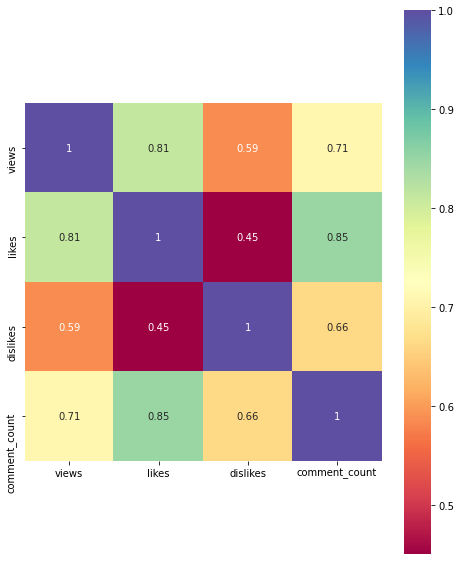

In [108]:
column_correlation = ['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize = (8, 10))
corr = df[column_correlation].corr()
_=sns.heatmap(corr, mask=np.zeros_like(corr, dtype = np.bool), cmap = "Spectral",
            square = True, ax = ax,annot = True)

Voici un schéma pour illustrer nos propos.

Pour la suite de notre étude, nous avons calculé la médiane pour ces 4 attributs afin d'attribuer des classes qui correspondent au degré de popularité des vidéos.

In [109]:
#Ajout de 4 colonnes médianes respectivement pour vues,likes,dislikes,commentaires

moyennesviews=[]
moyenneslikes=[]
moyennesdislikes=[]
moyennescomments=[]
classes=[]
dfmean=df.groupby("Category").median()
cat1=df["Category"].values.tolist()
cat2=dfmean.index.tolist()
viewsmoy=dfmean["views"].values.tolist()
likesmoy=dfmean["likes"].values.tolist()
commentsmoy=dfmean["comment_count"].values.tolist()
dislikesmoy=dfmean["dislikes"].values.tolist()
views=df["views"].values.tolist()
likes=df["likes"].values.tolist()
dislikes=df["dislikes"].values.tolist()
comments=df["comment_count"].values.tolist()
for i in range(len(cat1)):
    for j in range(len(cat2)):
        if(cat1[i]==cat2[j]):
            moyennesviews+=[viewsmoy[j]]
            moyenneslikes+=[likesmoy[j]]
            moyennesdislikes+=[dislikesmoy[j]]
            moyennescomments+=[commentsmoy[j]]
            if(views[i]>=viewsmoy[j] and likes[i]>=likesmoy[j] and dislikes[i]>=dislikesmoy[j] ):
                classes+=["P"]
            else:
                classes+=["TP"]
                
df["MédianeVue"]=moyennesviews
df["MédianeLikes"]=moyenneslikes
df["MédianeDislikes"]=moyennesdislikes
df["MédianeCommentaires"]=moyennescomments
df["Classe"]=classes
df["Classe"].value_counts()


TP    25254
P     15470
Name: Classe, dtype: int64

Isolation des colonnes pertinentes

In [110]:
df = df.drop(columns=["category_id", "trending_date", "publish_time", "tags", "thumbnail_link","comments_disabled", "ratings_disabled","video_error_or_removed", "description", "title", "video_id", "channel_title","Category", "MédianeVue", "MédianeLikes","MédianeDislikes","MédianeCommentaires","title_length" ])
df

,views,likes,dislikes,comment_count,Classe
18319,223,21,1,4,TP
19666,274,22,2,4,TP
23860,284,3,0,0,TP
21015,365,43,2,14,TP
21109,374,43,0,5,TP
...,...,...,...,...,...
33720,60776509,2183745,104379,232723,P
35626,62796390,4470923,119052,905925,P
35902,65396157,4750254,141966,1040912,P
5040,75969469,2251828,1127813,827755,P


On a renommé la colonne "classe" pour pouvoir appliquer l'algorithme C4.5

In [111]:
df['Decision']=df['Classe']
df = df.drop(columns=["Classe"])
df

,views,likes,dislikes,comment_count,Decision
18319,223,21,1,4,TP
19666,274,22,2,4,TP
23860,284,3,0,0,TP
21015,365,43,2,14,TP
21109,374,43,0,5,TP
...,...,...,...,...,...
33720,60776509,2183745,104379,232723,P
35626,62796390,4470923,119052,905925,P
35902,65396157,4750254,141966,1040912,P
5040,75969469,2251828,1127813,827755,P


On applique l'algorithme C4.5

In [112]:
# Apply C4.5
config = {'algorithm': 'C4.5'}

In [113]:
tree = chef.fit(df, config)

C4.5  tree is going to be built...
-------------------------
finished in  3.902130365371704  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  86.20469502013555 % on  40724  instances
Labels:  ['TP' 'P']
Confusion matrix:  [[22155, 2519], [3099, 12951]]
Precision:  89.7909 %, Recall:  87.7287 %, F1:  88.7478 %


Après l'application de l'algorithme C4.5, on obtiens une précision 89.79

On choisit la première ligne du dataframe et on affiche ses valeurs

In [114]:
df.iloc[0]

views            <=419921.8506040664
likes                             21
dislikes                           1
comment_count                      4
Decision                          TP
Name: 18319, dtype: object

On effectue une copie de notre ensemble de données puis on applique l'algorithme

In [115]:
tree = chef.fit(df.copy(), config)

C4.5  tree is going to be built...
-------------------------
finished in  3.3790104389190674  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  86.20469502013555 % on  40724  instances
Labels:  ['TP' 'P']
Confusion matrix:  [[22155, 2519], [3099, 12951]]
Precision:  89.7909 %, Recall:  87.7287 %, F1:  88.7478 %


on affiche à nouveau la 1ère ligne 

In [116]:
df.iloc[0]

views            <=419921.8506040664
likes                             21
dislikes                           1
comment_count                      4
Decision                          TP
Name: 18319, dtype: object

On essaye maintenant de prédire la classe de cette ligne

In [117]:
prediction = chef.predict(tree, df.iloc[0])
prediction

'TP'

L'algorithme a bien prédit la classe de la première ligne du dataframe

On comparer la classe réelle et la classe prédite pour chaque ligne du dataframe

In [118]:
print("actual - prediction")
for index, instance in df.iterrows():
    prediction = chef.predict(tree, instance)
    actual = instance['Decision']
    if actual == prediction:
        classified = True
    else:
        classified = False
        print("*", end='')
    print(actual,"   -  ",prediction)

actual - prediction
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP    -   TP
TP   

Lorsqu'il y'a une étoile en face d'une ligne celà signifie que la clase a été mal prédite

In [119]:
prediction_set=[]
for index, instance in df.iterrows():
     prediction = chef.predict(tree, instance)
     prediction_set.append(prediction)

In [120]:
# Accuracy
print(metrics.accuracy_score(df['Decision'],prediction_set))

0.8620469502013555


On obtient finalement une précision de 86%.
On peut dire alors que l'algorithme a bien prédit les classes de chaque objet en fonction des différents attributs qu'on a sélectionné (views, likes, dislikes, comment_count).

# Conclusion 

Nous avons analysé un ensemble de données contenant des informations sur 205 jours de vidéos YouTube populaires. Cet ensemble de données a été collecté en 2017 et 2018. Il contient 40724 entrées vidéo, mais ne contient pas 40 494 vidéos uniques. En effet il contient 30 184 vidéos uniques. 
En France 98.8% des vidéos populaires ont moins de 5 million de vues et 1.2% ont plus de 5 millions de vues. 52% des vidéos populaires ont moins de 2222 likes. On remarque également 66% des vidéos populaires ont moins de 200 dislikes. De plus 94% des vidéos populaires ont moins de 5 000 commentaires. 
Suite à notre analyse sur les titres des vidéos, nous avons observé que la longueur du titre des vidéos populaires avec plus de 5 millions de vues est comprise entre 12 et 33 caractères. La catégorie de vidéos la plus populaire est "Unknown", suivie de la catégorie "People & Blogs. À l'inverse, la catégorie avec le moins de vidéos tendance est "Trailer", suivi par "Movies", puis "Shows".
Nous avons étudié la corrélation entre les différents attributs numériques et nous avons constaté qu’il existe une forte corrélation positive entre le nombre de vues et le nombre de likes. Il existe également une forte corrélation positive entre le nombre de likes et le nombre de commentaires, et il existe également une faible corrélation entre le nombre de likes et le nombre de dislikes. Cette étude de corrélation nous a permis de choisir les attributs pour faire notre prédiction. La prédiction se base sur la détermination du degré de popularité de la vidéo (très populaire ou populaire). Pour effectuer cette prédiction, nous avons utilisé l’algorithme C4.5. Cet algorithme nous a permis de déterminer avec une précision de 86% le degrés de popularité de chaque vidéo du dataframe.

